In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pmdarima.arima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [52]:
df = pd.read_csv('data/Kaub_Level_Since_2013.csv')
path = 'results/' # Used for saving figures later on

In [28]:
print(len(df))

3224


Now make a 90-10 train test split



In [29]:
auto_arima(df['level'], m=7, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[7] intercept   : AIC=25055.204, Time=5.44 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=27774.519, Time=0.06 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=25744.082, Time=0.83 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=25609.112, Time=1.07 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=27772.695, Time=0.04 sec
 ARIMA(2,1,2)(0,0,1)[7] intercept   : AIC=25056.481, Time=4.07 sec
 ARIMA(2,1,2)(1,0,0)[7] intercept   : AIC=25056.322, Time=3.38 sec
 ARIMA(2,1,2)(2,0,1)[7] intercept   : AIC=25055.938, Time=23.62 sec
 ARIMA(2,1,2)(1,0,2)[7] intercept   : AIC=25055.947, Time=26.12 sec
 ARIMA(2,1,2)(0,0,0)[7] intercept   : AIC=25057.135, Time=1.24 sec
 ARIMA(2,1,2)(0,0,2)[7] intercept   : AIC=25055.970, Time=18.82 sec
 ARIMA(2,1,2)(2,0,0)[7] intercept   : AIC=25055.621, Time=18.25 sec
 ARIMA(2,1,2)(2,0,2)[7] intercept   : AIC=25057.894, Time=28.07 sec
 ARIMA(1,1,2)(1,0,1)[7] intercept   : AIC=25101.444, Time=4.32 sec
 ARIMA(2,1,1)(

ARIMA(order=(3, 1, 3), scoring_args={}, seasonal_order=(0, 0, 0, 7),
      suppress_warnings=True, with_intercept=False)

In [40]:
my_order = (3, 0, 1)
my_seasonal_order = (1, 0, 2, 7)
model = SARIMAX(df['level'], order=my_order, seasonal_order=my_seasonal_order, enforce_stationarity=True)
model_fit = model.fit(maxiter=200)

/home/pascal/anaconda3/envs/forecasting/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.67814D+00    |proj g|=  1.53627D+00

At iterate    5    f=  3.92827D+00    |proj g|=  7.07697D-02

At iterate   10    f=  3.89087D+00    |proj g|=  9.93981D-03

At iterate   15    f=  3.88873D+00    |proj g|=  1.88949D-03

At iterate   20    f=  3.88852D+00    |proj g|=  5.42169D-04

At iterate   25    f=  3.88821D+00    |proj g|=  9.44622D-03

At iterate   30    f=  3.88783D+00    |proj g|=  7.20875D-04

At iterate   35    f=  3.88782D+00    |proj g|=  4.16346D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

In [73]:
yhats = model_fit.predict(start=len(df), end=len(df)+7)

In [74]:
yhats

3224    81.846373
3225    81.801206
3226    81.761656
3227    81.638824
3228    81.331646
3229    80.889586
3230    80.298124
3231    79.693174
Name: predicted_mean, dtype: float64

<AxesSubplot:>

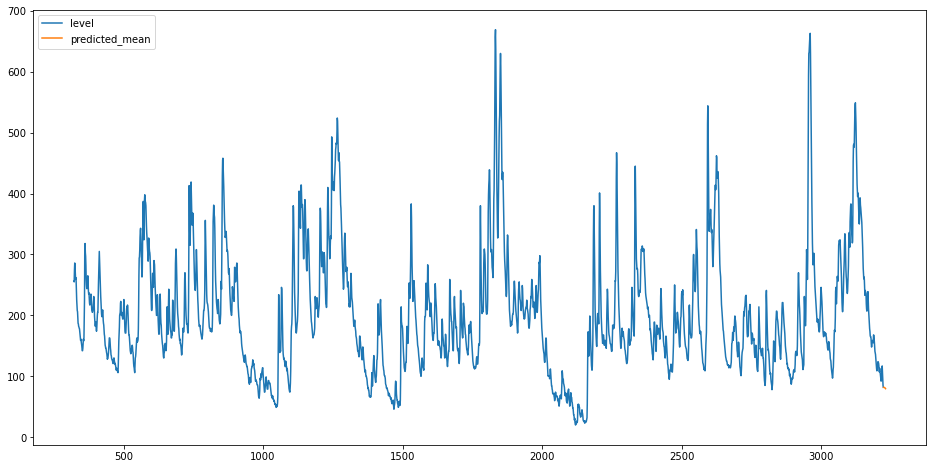

In [75]:
start = len(df_train)
plt.figure(1)
end = len(df_train) + len(df_train) - 1
ax = df_train['level'].plot(legend=True, figsize=(16,8))
yhats.plot(legend=True)


<Figure size 432x288 with 0 Axes>

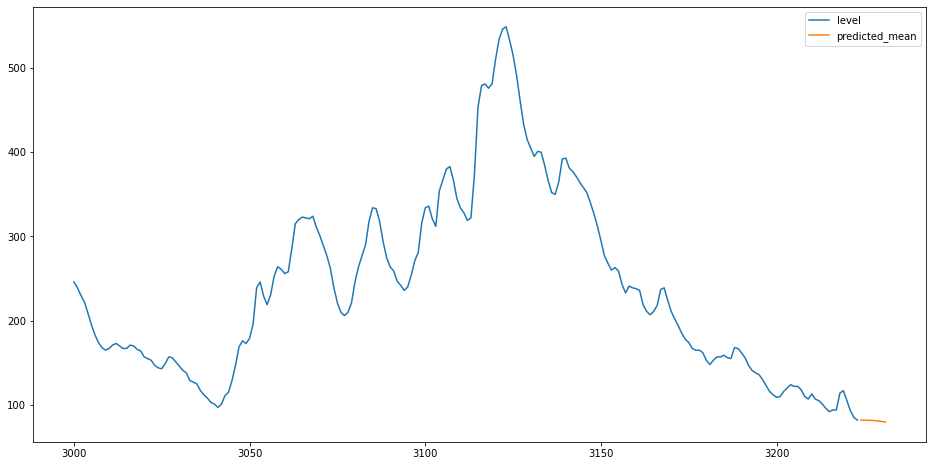

In [76]:
plt.figure(2)
ax = df.loc[3000:].plot(legend=True,figsize=(16,8))
yhats.plot(legend=True)
plt.savefig(path + 'sarima_closeup.png', dpi=300)

In [77]:
full_yhats = model_fit.predict(start=0, end = len(df))

<Figure size 6000x4000 with 0 Axes>

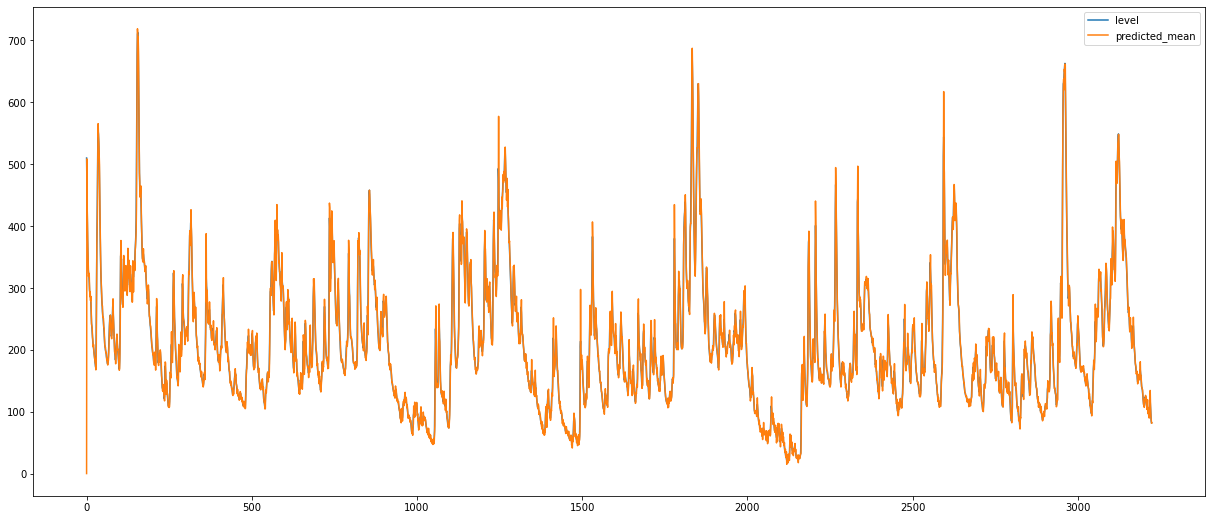

In [78]:
plt.figure(3,dpi=1000)
ax = df.plot(legend=True, figsize=(21,9))
full_yhats.plot(legend=True)
plt.savefig(path + 'sarima_over_actual_data.png',dpi=300)